In [1]:
%matplotlib inline
import glob
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
import pandas as pd

# 1 Cotización

In [2]:
cot_all = pd.read_excel('..\\..\\Datos\\working\\cotizaciones_all.xlsx')
print(cot_all.shape)
cot_all.head()

(16592, 41)


,ID,Fecha Cotizacion,Medio,Tipo de Medio,Proyecto,Etapa,Productos,Presencial,Remoto,Jefe Comercial,...,Razon Social,Giro,Nacionalidad,N° Grupo Familiar,Actividad,Cargo,Situacion Laboral,Empleador,Antiguedad Laboral,Profesión
0,111502,2017-07-27 15:46:54,RECORRIDO POR EL SECTOR,Paseo,Altos del Valle,ADV - Etapa 1,"TB-104,Est-65",Si,No,Alejandra Pooley Flores,...,NaN,NaN,NaN,3,Tecnico,NaN,NaN,NaN,0.0,NaN
1,111611,2017-07-29 13:37:05,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"TA-302,Est-41,Bod-02",No,No,Alejandra Pooley Flores,...,NaN,NaN,NaN,Sin Información,Empleado,NaN,NaN,NaN,0.0,NaN
2,111629,2017-07-29 16:41:15,RECORRIDO POR EL SECTOR,Paseo,Altos del Valle,ADV - Etapa 1,"TA-303,Est-01",Si,No,Alejandra Pooley Flores,...,NaN,NaN,NaN,3,Empleado,NaN,NaN,NaN,0.0,NaN
3,111766,2017-07-31 11:01:57,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"TA-302,Est-41,Bod-06",No,No,Alejandra Pooley Flores,...,NaN,NaN,Chilena,Sin Información,Empleado,a,Sin Información,a,1.0,Empresario
4,111794,2017-07-31 15:52:32,RECORRIDO POR EL SECTOR,Paseo,Altos del Valle,ADV - Etapa 1,"TA-604,Est-01",Si,No,Alejandra Pooley Flores,...,NaN,NaN,Chilena,4,Profesional,NaN,NaN,NaN,0.0,Constructor Civil


In [3]:
cot_all.columns

Index(['ID', 'Fecha Cotizacion', 'Medio', 'Tipo de Medio', 'Proyecto', 'Etapa',
       'Productos', 'Presencial', 'Remoto', 'Jefe Comercial',
       'Ejecutivo Comercial', 'Total Productos', 'Descuentos',
       'Valor Final Venta', 'RUT', 'Nombre', 'Apellido 1', 'Apellido 2',
       'Nombre Completo', 'Telefono', 'Celular', 'Direccion', 'Region',
       'Provincia', 'Comuna', 'Correo Electronico', 'Sexo', 'Estado Civil',
       'Rango Edad', 'Fecha Nacimiento', 'Tipo Cliente', 'Razon Social',
       'Giro', 'Nacionalidad', 'N° Grupo Familiar', 'Actividad', 'Cargo',
       'Situacion Laboral', 'Empleador', 'Antiguedad Laboral', 'Profesión'],
      dtype='object')

In [4]:
# Tipos de atributos
g = cot_all.columns.to_series().groupby(cot_all.dtypes).groups
for key in g.keys():
    print('Key: ',key)
    print('Total attributes: ',len(g[key]))

Key:  int64
Total attributes:  1
Key:  datetime64[ns]
Total attributes:  2
Key:  float64
Total attributes:  4
Key:  object
Total attributes:  34


## 1.1 Utils

In [5]:
#Variables categoricas
def ver_atributo_categorico(df,col,limit=False,lim=10,log=False,hue=None,palette=None):
    l = df[col].unique().tolist()
    l_len = len(l)
    
    if log:
        print(l_len,l)
    
    
    f = plt.figure(figsize=(15,12))
    sb.set_color_codes("muted")
    if limit:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:lim],hue=hue,palette=palette);
    else:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:l_len],hue=hue,palette=palette);

## 1.2 Categorical Exploration

### 1.2.1 Etapa

In [6]:
for group, frame in cot_all.groupby('Proyecto'):
    print(group, frame.Etapa.unique())

Altos del Valle ['ADV - Etapa 1']
Edificio Junge ['Quinta Junge - Torre B' 'Quinta Junge - Torre A']
Edificio Mil610 ['EM610 - Etapa 1']
Edificio Urban 1470 ['Urban 1470 - Etapa 1']
San Andres Del Valle ['SADV - ET01 Condominio Azapa' 'SADV - ET02 Condominio Choapa'
 'SADV - ET03 Condominio Rapel' 'SADV - ET04 Condominio Copiapo'
 'SADV - ET05 Condominio Huasco' 'SADV - ET18 Valle Malleco'
 'SADV - ET06 Condominio Illapel']


### 1.2.1 Medio

0


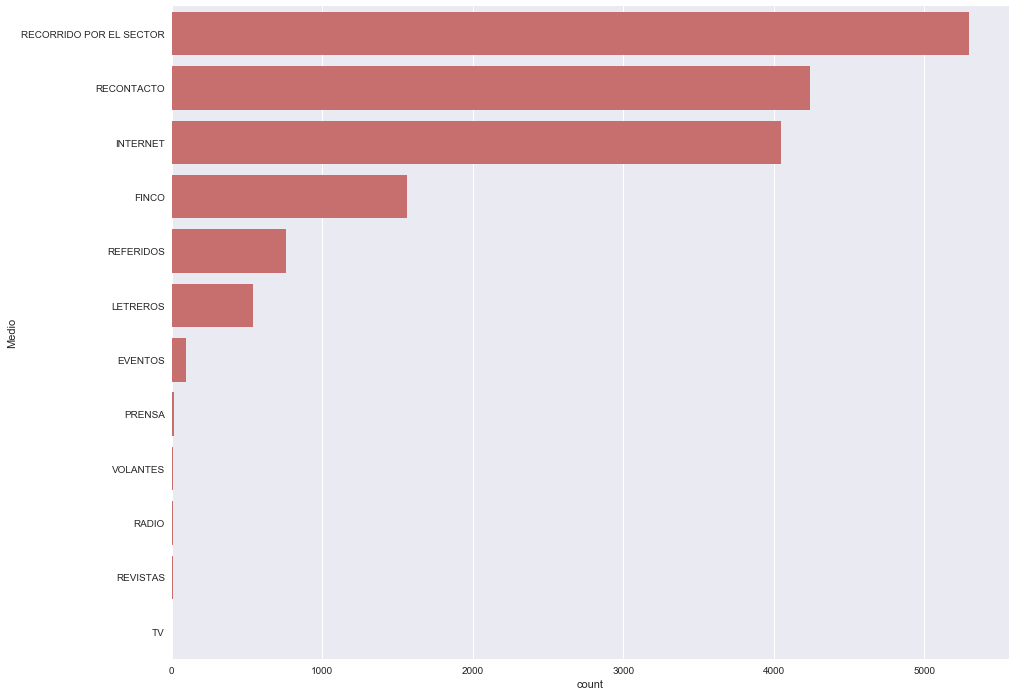

In [7]:
print(cot_all.Medio.isnull().sum())
ver_atributo_categorico(cot_all,'Medio')

### 1.2.2 Tipo Medio

0


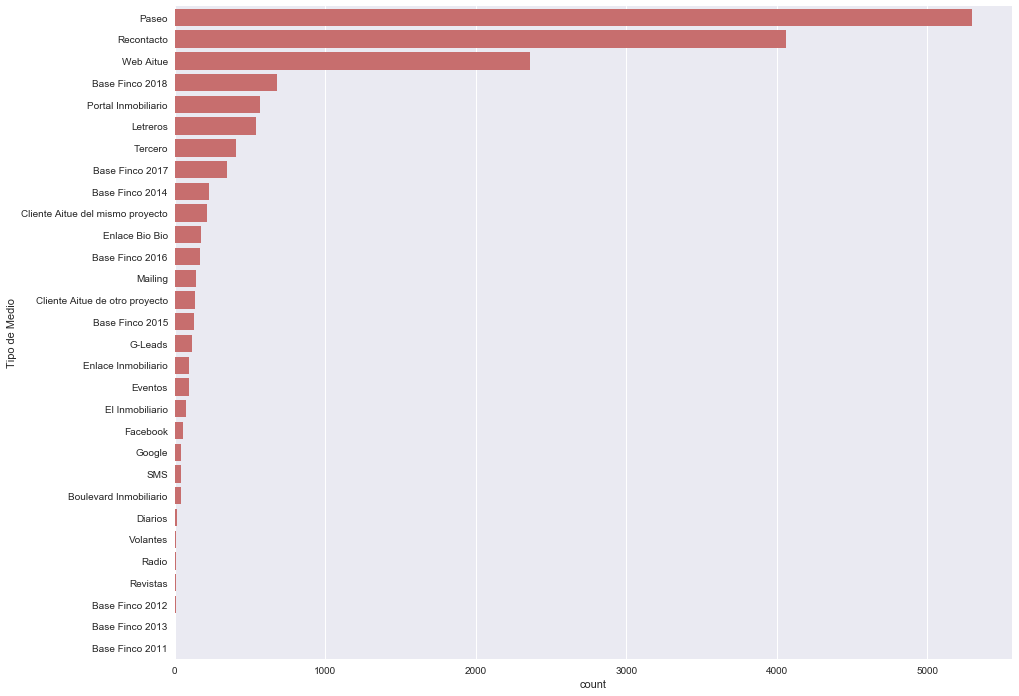

In [8]:
print(cot_all.Proyecto.isnull().sum())
ver_atributo_categorico(cot_all,'Tipo de Medio',lim=30,limit=True)

### 1.2.3 Proyecto

0


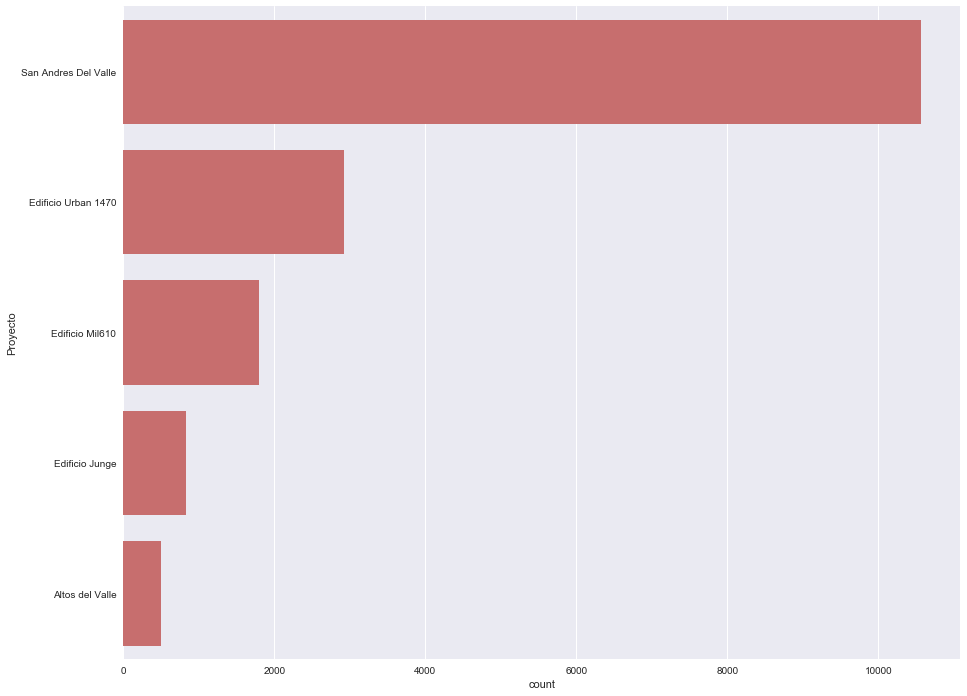

In [9]:
print(cot_all.Proyecto.isnull().sum())
ver_atributo_categorico(cot_all,'Proyecto')

### 1.2.4 Sexo

Nulos  1869


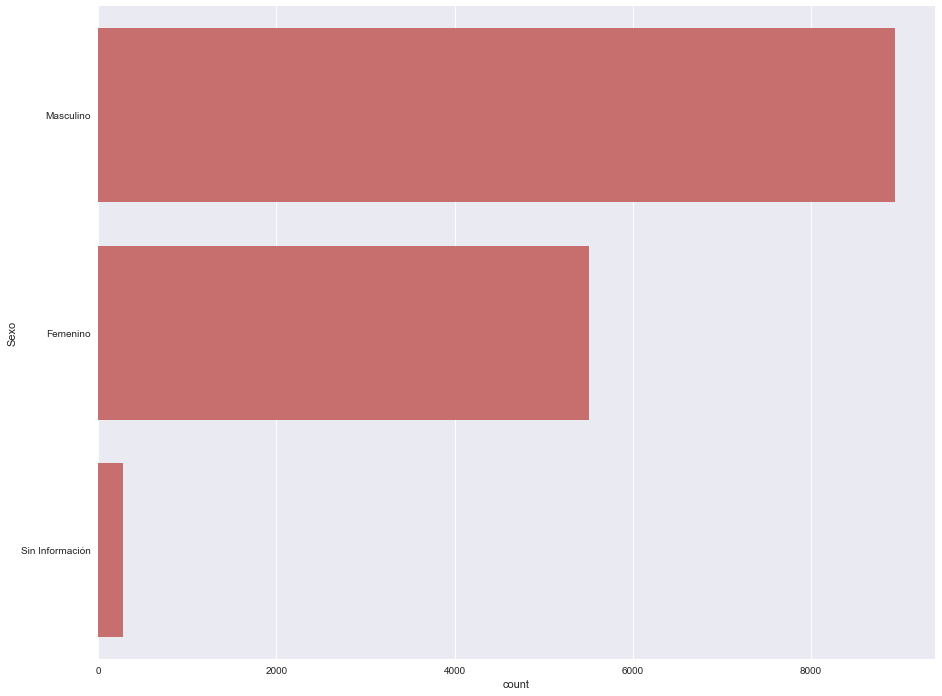

In [10]:
print('Nulos ',cot_all.Sexo.isnull().sum())
ver_atributo_categorico(cot_all,'Sexo')

### 1.2.5 Remoto

Nulos  3310


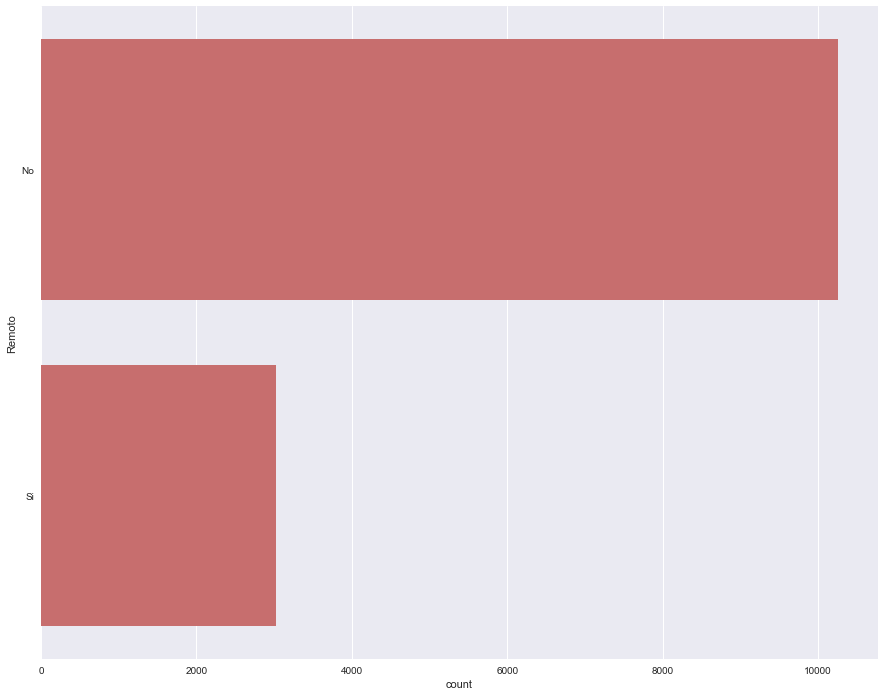

In [11]:
print('Nulos ',cot_all.Remoto.isnull().sum())
ver_atributo_categorico(cot_all,'Remoto')

### 1.2.6 Presencial

2027


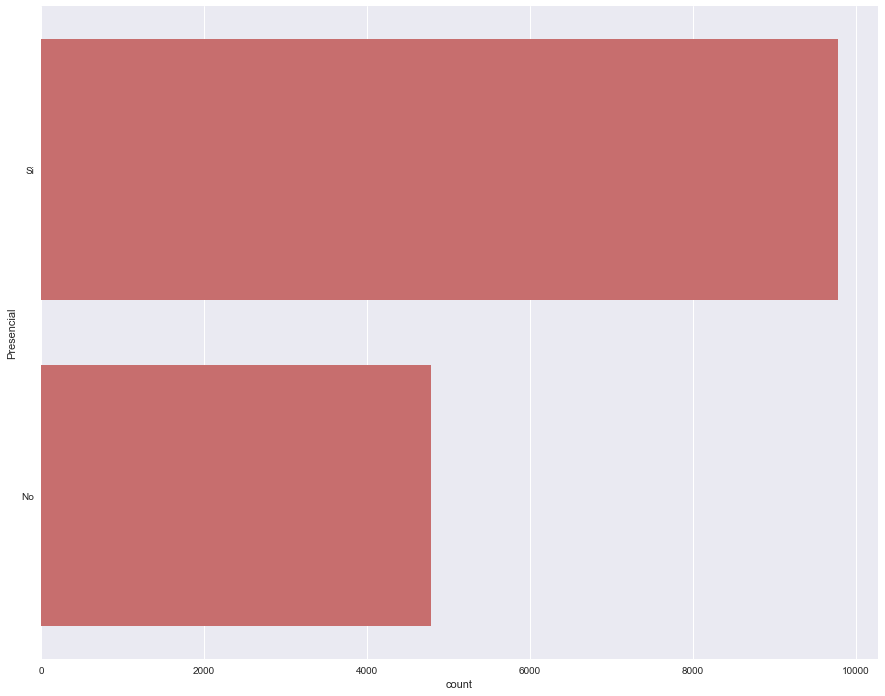

In [12]:
print(cot_all.Presencial.isnull().sum())
ver_atributo_categorico(cot_all,'Presencial')

### 1.2.7 Region

0


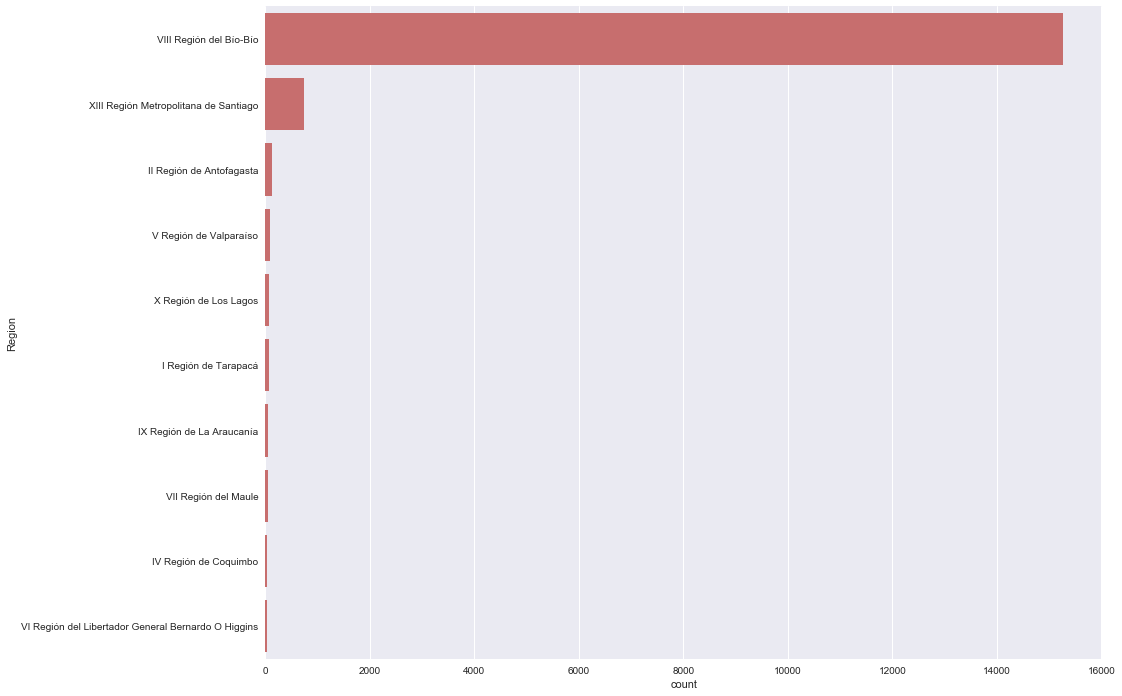

In [13]:
print(cot_all.Region.isnull().sum())
ver_atributo_categorico(cot_all,'Region',lim=10,limit=True)

### 1.2.8 Provincia

0


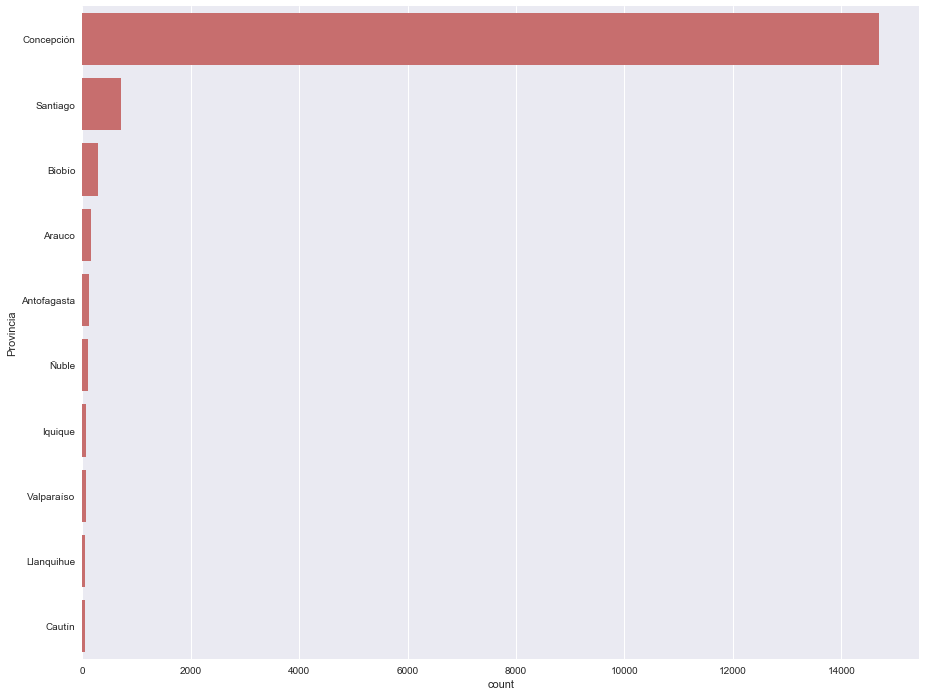

In [14]:
print(cot_all.Provincia.isnull().sum())
ver_atributo_categorico(cot_all,'Provincia',lim=10,limit=True)

### 1.2.9 Comuna

0


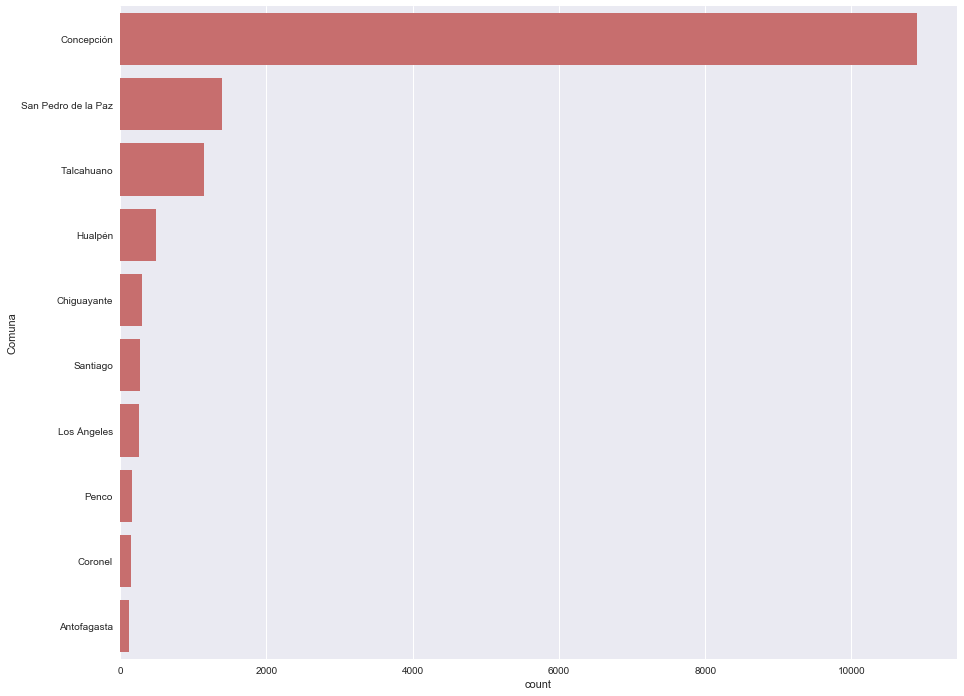

In [15]:
print(cot_all.Comuna.isnull().sum())
ver_atributo_categorico(cot_all,'Comuna',lim=10,limit=True)

### 1.2.10 Estado Civil

Nulos  2049


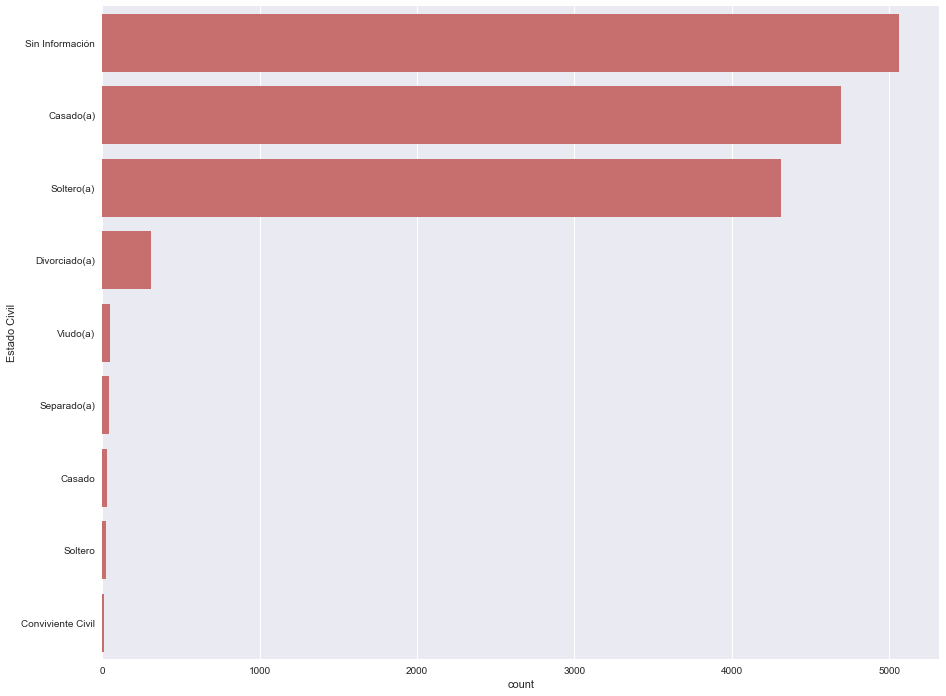

In [16]:
print('Nulos ',cot_all['Estado Civil'].isnull().sum())
ver_atributo_categorico(cot_all,'Estado Civil')

### 1.2.11 Etapa

0


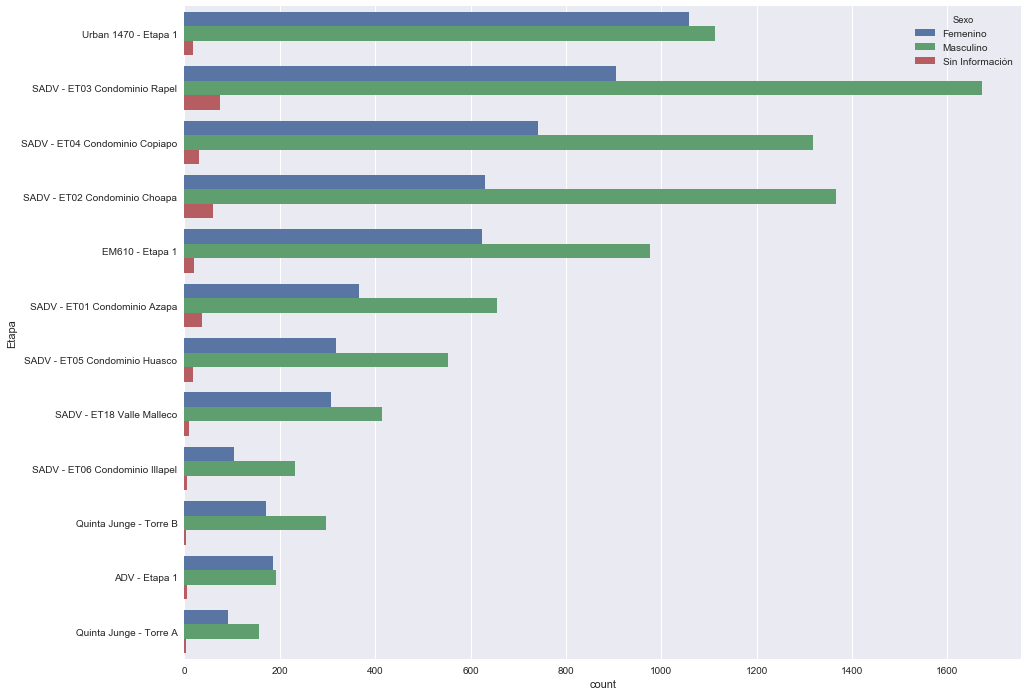

In [17]:
print(cot_all.Etapa.isnull().sum())
palette=["C0","C1","C2"]
ver_atributo_categorico(cot_all,'Etapa',hue='Sexo',palette=palette)

### 1.2.12 Actividad

2350
7 ['Tecnico', 'Empleado', 'Profesional', 'Independiente (no profesional)', nan, 'Dueña de casa', 'Estudiante']


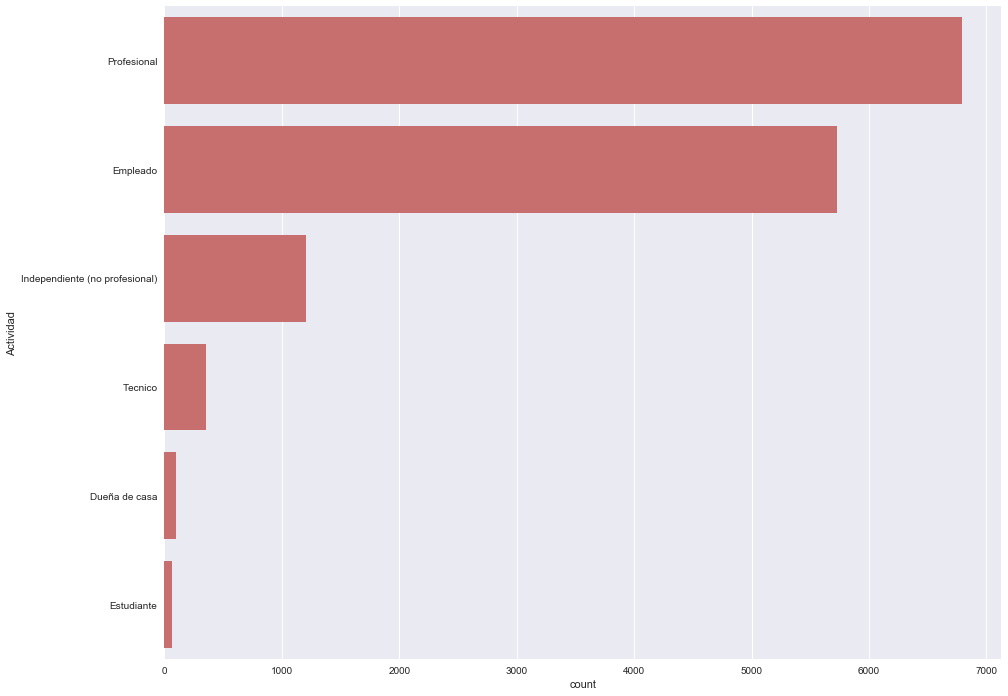

In [18]:
print(cot_all.Actividad.isnull().sum())
ver_atributo_categorico(cot_all, 'Actividad', log=True, limit = True, lim=30)

### 1.2.13 Nro Grupo Familiar

5964


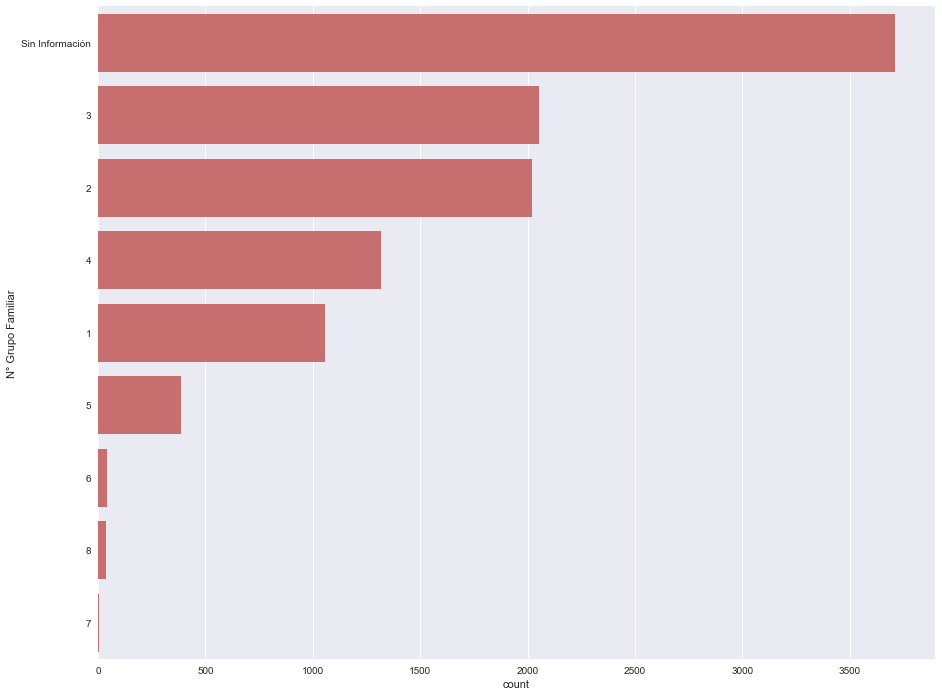

In [19]:
print(cot_all['N° Grupo Familiar'].isnull().sum())
ver_atributo_categorico(cot_all,'N° Grupo Familiar')

### 1.2.14 Cargo

Nulos  13771
445 [nan, 'a', 'Profesora', 'Matrona', 'Odontologo', 'Biotecnologo', 'Metereologo', 'Ingeniero de mantención', 'Administrador de Obras', 'Vendedor Técnico', 'Enfermeria', 'Consultor Senior 2', 'Jefe de costos y presupuestos', 'Jefe área de repuestos', 'Supervisor Inmobiliario.', 'Jubilada', 'Jejfa de local', 'Ingeniero Civil', 'Ingeniero', 'Inspección técnica', 'Médico', 'Directora', 'Jefe de area', 'Psicóloga', 'Analista de control de gestión', 'enfermera de gestion', 'Ejecutivo Plataforma Normalizacion', 'Super Intendente de Terminal', 'Enfermera', 'partner manager', 'Ingeniero.', 'Ejecutivo de Negocios', '.', 'Fonoaudiólogo', 'Control de proyecto', 'ENCARGADO DE COMUNICACIONES', '\xa0\xa0\xa0\xa0', 'Chef', 'Independiente', 'Jefe Planificación', 'gerente de tienda', 'enfermera', 'vendedora', 'administrativo', 'Profesional de Obras', 'Gestor de inversiones senior', 'jefe de desarrollo', 'Pediatra', 'Medico Cirujano', 'Dueño', 'docente', 'Ingeniario civil en obras civiles'

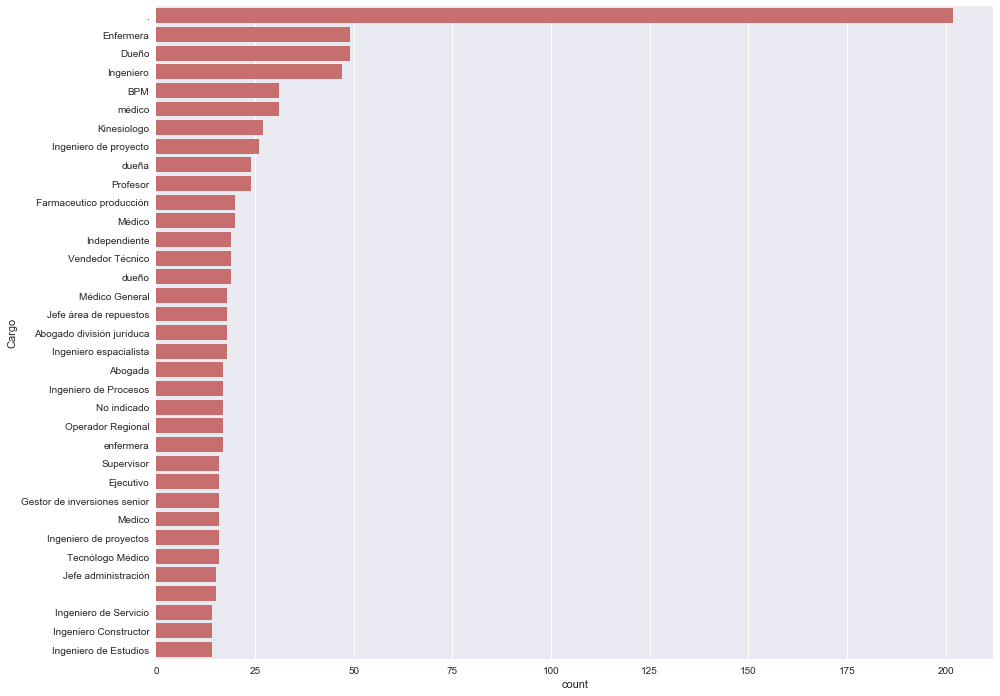

In [20]:
print('Nulos ', cot_all['Cargo'].isnull().sum())
ver_atributo_categorico(cot_all, 'Cargo', limit=True, lim=35, log=True)

Nulos  13771
444


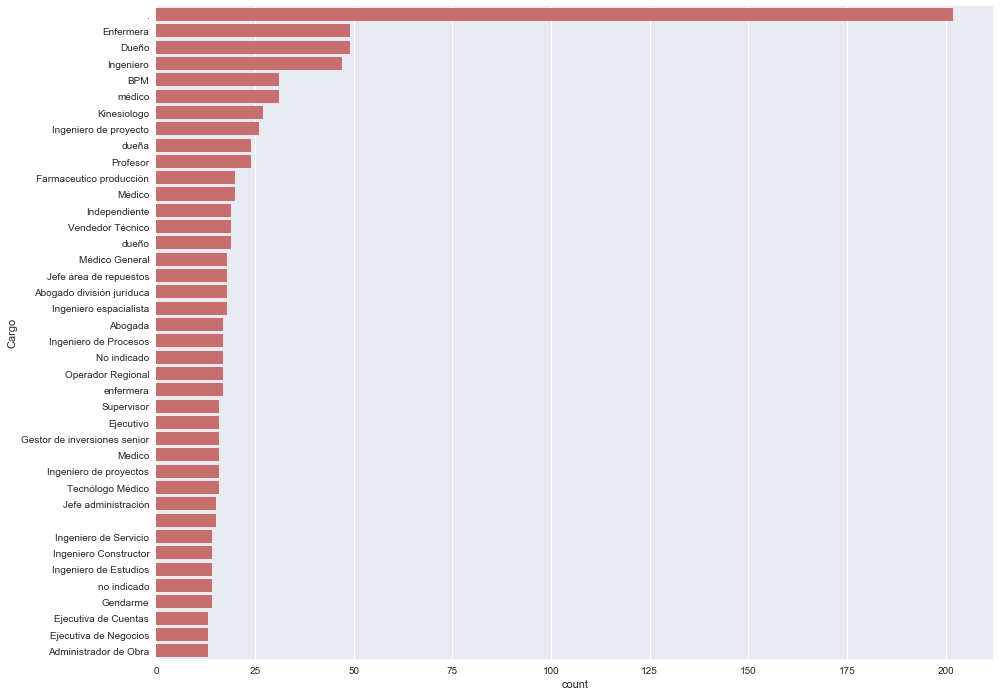

In [21]:
print('Nulos ', cot_all['Cargo'].isnull().sum())
print(cot_all['Cargo'].nunique())
ver_atributo_categorico(cot_all, 'Cargo', limit=True, lim=40)

### 1.2.15 Situacion Laboral

12795
3


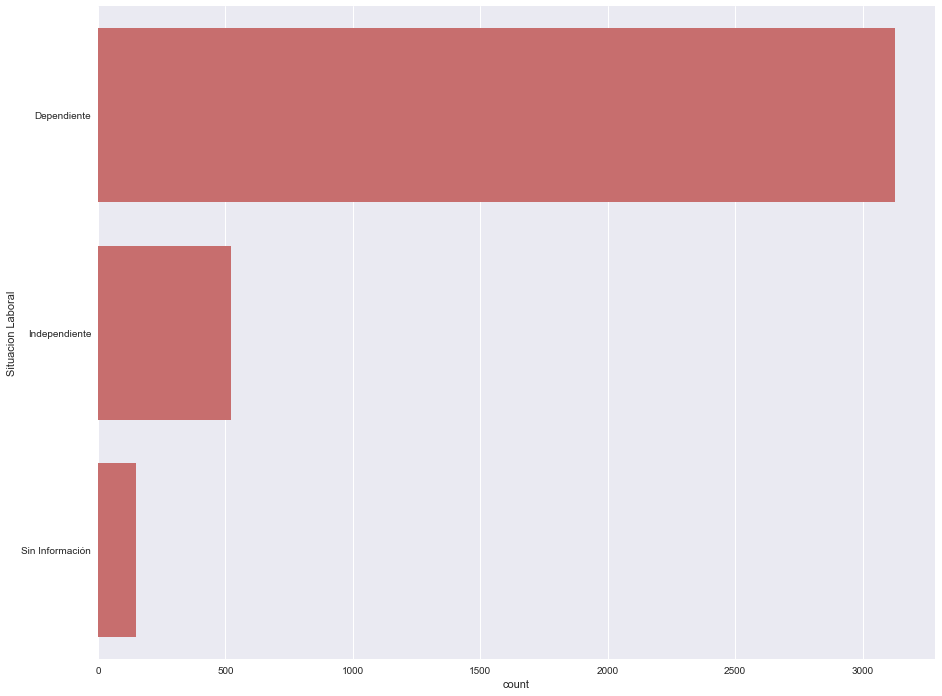

In [22]:
print(cot_all['Situacion Laboral'].isnull().sum())
print(cot_all['Situacion Laboral'].nunique())
ver_atributo_categorico(cot_all,'Situacion Laboral')

### 1.2.16 Nacionalidad

11744
8


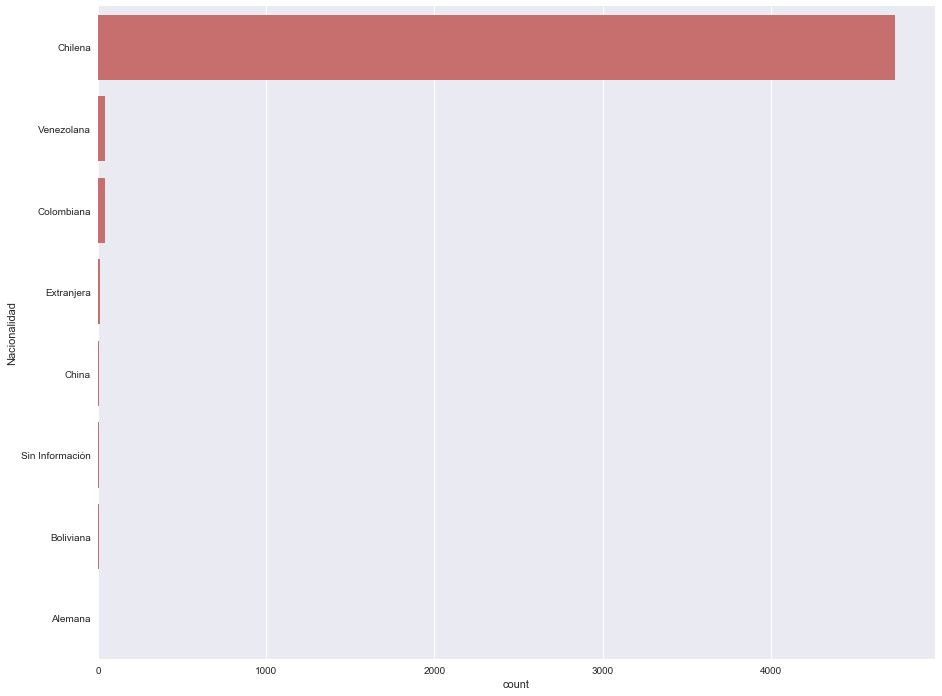

In [23]:
print(cot_all.Nacionalidad.isnull().sum())
print(cot_all.Nacionalidad.nunique())
ver_atributo_categorico(cot_all,'Nacionalidad')

### 1.2.17 Empleador

13588
509


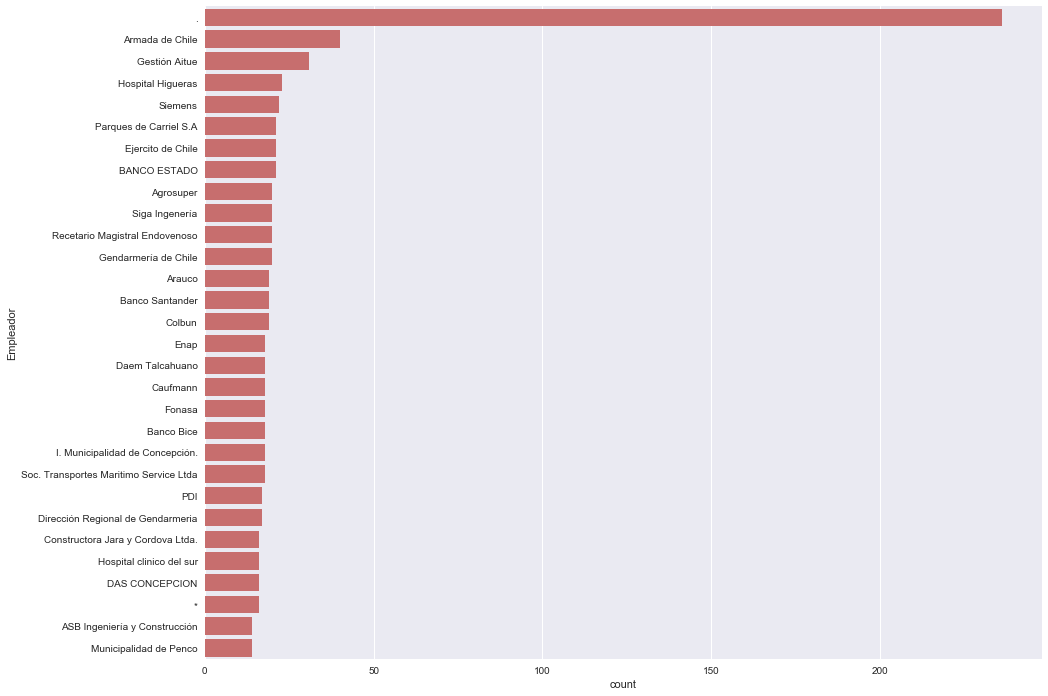

In [24]:
print(cot_all.Empleador.isnull().sum())
print(cot_all.Empleador.nunique())
ver_atributo_categorico(cot_all,'Empleador',log=False, limit = True, lim=30)

510 [nan, 'a', 'Norteamericano / USS / UDD', 'Cesfam Lautaro Caceres', 'BioForest S.A.', 'DGAC', 'ACCIONA agua', 'Constructora Aitue \xa0\xa0\xa0', 'Arrigoni Ing.Y Const. S.A', 'Soc. Transportes Maritimo Service Ltda', 'Traumatologico', 'Besalco MD Montajes', 'Management Solutions Limitada', 'Forestal Celco', 'Caufmann', 'Inmobiliaria Los Pellines S.A.', 'MOP', '*', 'DFV Ingeniería y Gestión', 'Clinical Service', 'Hospital de Tomé', 'Municipalidad de Penco', 'Sanatorio Aleman \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0', 'Huachipato', 'Catim', 'CAP \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0', 'Municipalidad de Lota', 'Banco Estado', 'SVTI', 'Forestal papelera concepción', 'H&M Hennes & Mauritz SPA', '.', 'Chilena Consolidada seguros generales', 'Sociedad Educacional Juan Bosco LTDA', 'DAEM Hualpen', 'Ausenco Chile LTDA', 'HOSPITAL CLINICO DEL SUR SPA', 'Corporación Adventista \xa0\xa0\xa0\xa0\xa0\xa0\xa0', '\xa0\xa0

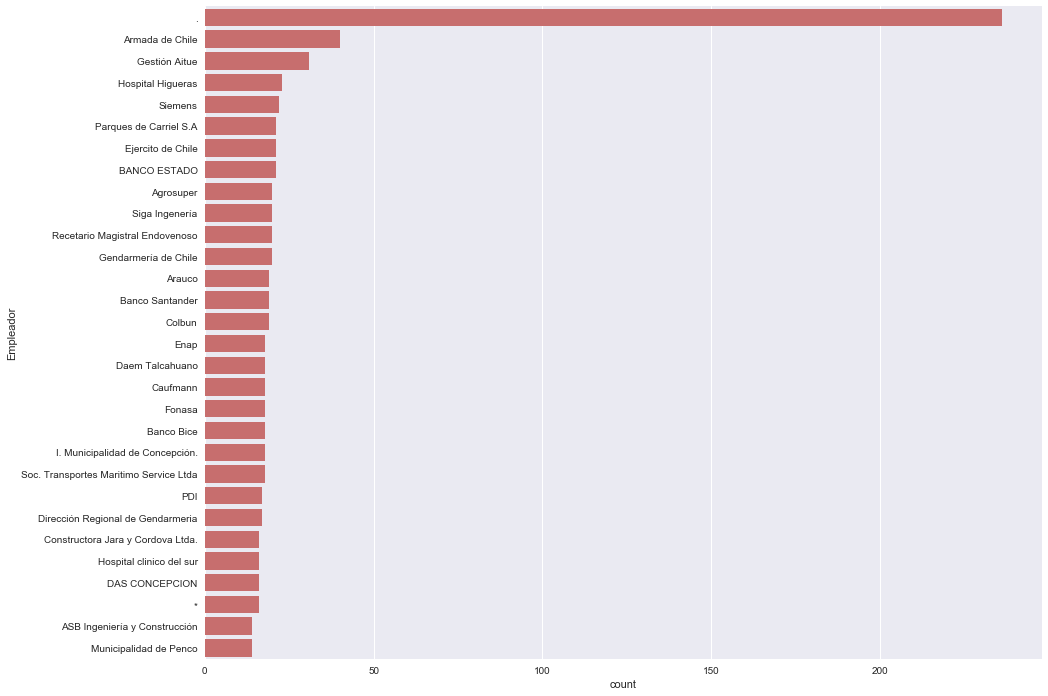

In [25]:
ver_atributo_categorico(cot_all,'Empleador',log=True, limit = True, lim=30)

### 1.2.18 Profesion

130 [nan, 'Empresario', 'Constructor Civil', 'Traductor e Interprete', 'Matrona', 'Odontólogo', 'Profesor', 'Ingeniería en Biotecnología', 'Otro', 'Ingeniero Eléctrico', 'Técnico en Construcción', 'Fonoaudiólogo', 'Diseño Industrial', 'Mecánico Industrial', 'Empleado Público', 'Enfermería', 'Ingeniero en Administración', 'Contador Auditor', 'Ingeniero Comercial', 'Ingeniero en Construcción', 'Ingeniero', 'Empleado', 'Agronomo', 'Prevencionista de Riesgos', 'Ingeniero Civil Química', 'Administrador', 'Ingeniero Civil Industrial', 'Nutrición y Dietética', 'Tecnólogo Médico', 'Abogado', 'Médico', 'Educadora de Párvulos', 'Administrador Público', 'Periodista', 'Ingeniero de Ejecución', 'Psicólogo', 'Arquitecto', 'Ingeniero Civil Electrónico', 'Ingeniero en Prevención de Riesgo', 'Ingeniero Civil Eléctrico', 'Vendedor', 'Pastor', 'Administración de Empresas', 'Administrativo', 'Docente', 'Ingeniero Agronomo', 'Trabajo Social', 'Ingeniero Biomédica', 'Dueña De Casa', 'Ingeniero Civil en Info

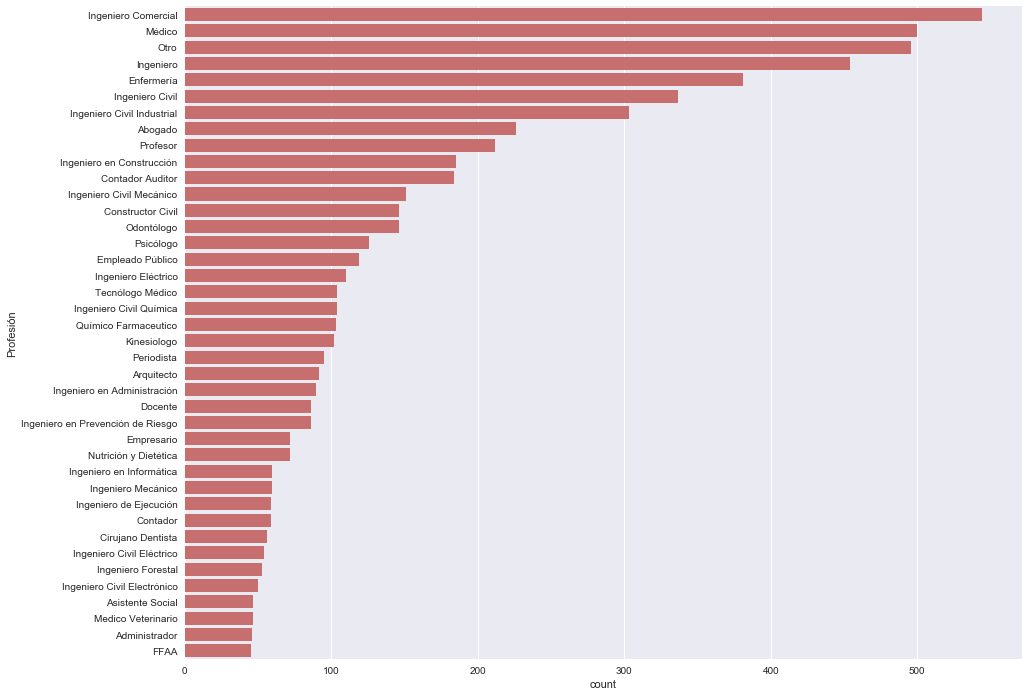

In [26]:
# print(cot_all['Profesión'].isnull().sum())
ver_atributo_categorico(cot_all,'Profesión',log=True, limit = True, lim=40)

9226
129


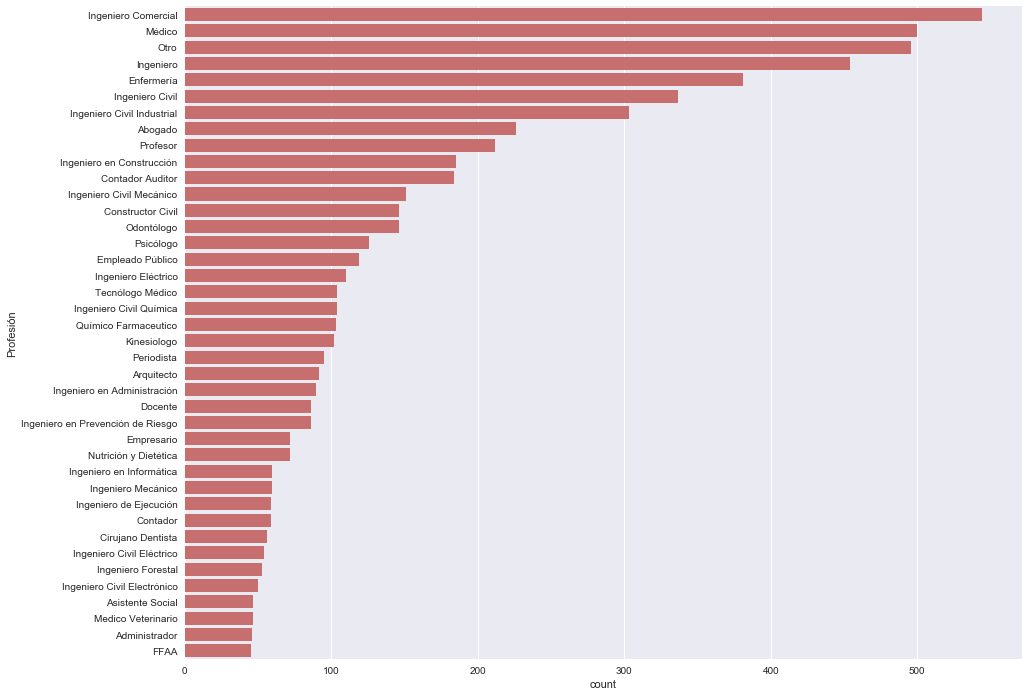

In [27]:
print(cot_all['Profesión'].isnull().sum())
print(cot_all['Profesión'].nunique())
ver_atributo_categorico(cot_all,'Profesión', limit = True, lim=40)

### 1.2.19 Tipo Cliente

1
3 ['Natural', 'Jurídico', nan]


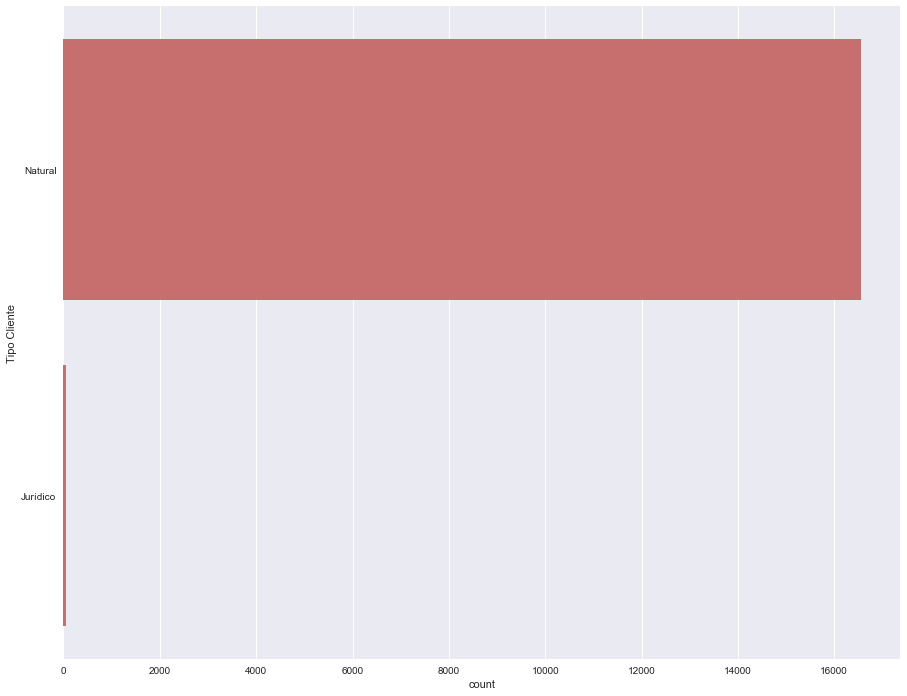

In [28]:
print(cot_all['Tipo Cliente'].isnull().sum())
ver_atributo_categorico(cot_all,'Tipo Cliente',log=True, limit = True, lim=20)

### 1.2.20 Antiguedad Laboral

Nulos 172
Unicos 35
36 [0.0, 1.0, 5.0, 2.0, 29.0, 6.0, 3.0, 37.0, 7.0, 13.0, nan, 9.0, 11.0, 10.0, 15.0, 4.0, 20.0, 22.0, 12.0, 8.0, 40.0, 31.0, 18.0, 17.0, 32.0, 16.0, 27.0, 14.0, 24.0, 23.0, 33.0, 19.0, 28.0, 21.0, 30.0, 100.0]


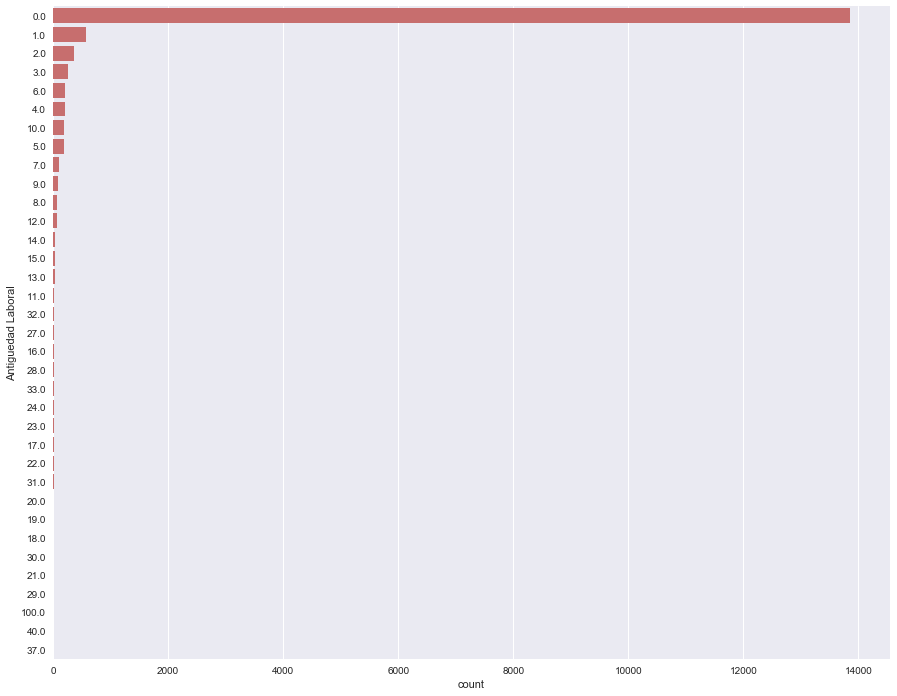

In [29]:
print("Nulos", cot_all['Antiguedad Laboral'].isnull().sum())
print("Unicos", cot_all['Antiguedad Laboral'].nunique())
ver_atributo_categorico(cot_all,'Antiguedad Laboral',log=True)

### 1.2.21 Dirección

11384
1291


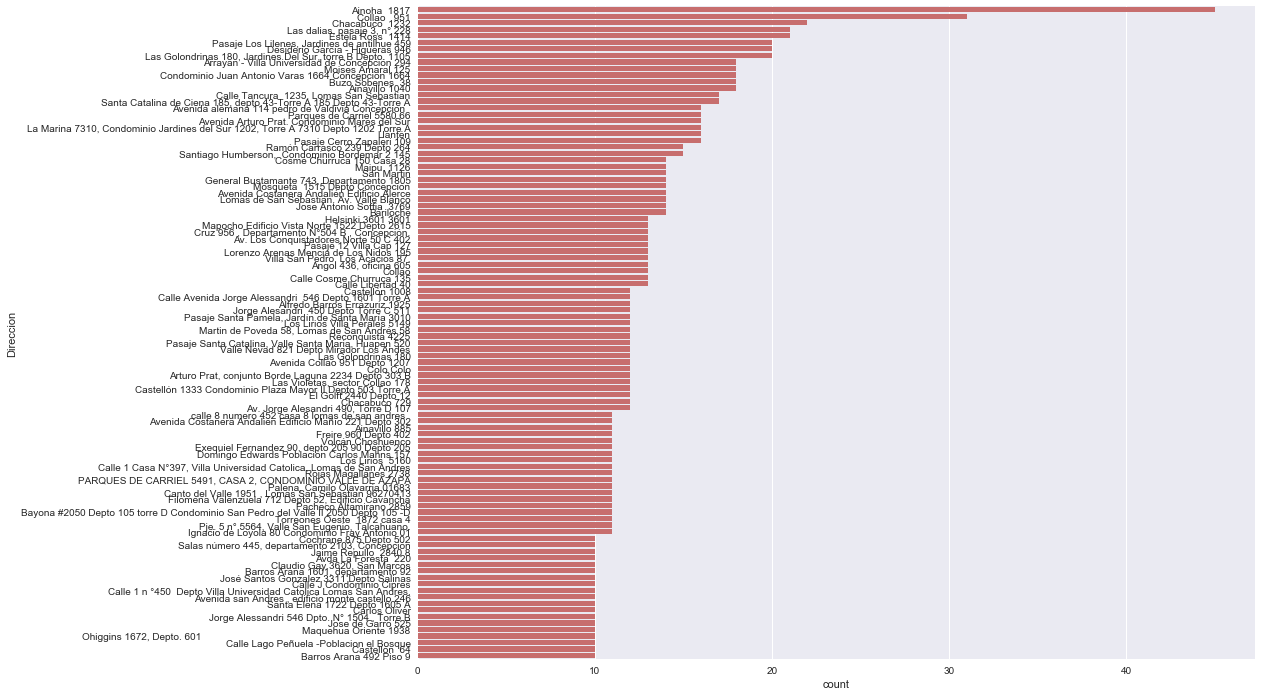

In [30]:
print(cot_all['Direccion'].isnull().sum())
print(cot_all['Direccion'].nunique())
f = plt.figure(figsize=(10,29))
ver_atributo_categorico(cot_all,'Direccion', log=False, lim=100, limit=True)

### 1.2.22 Nombre

0
2481


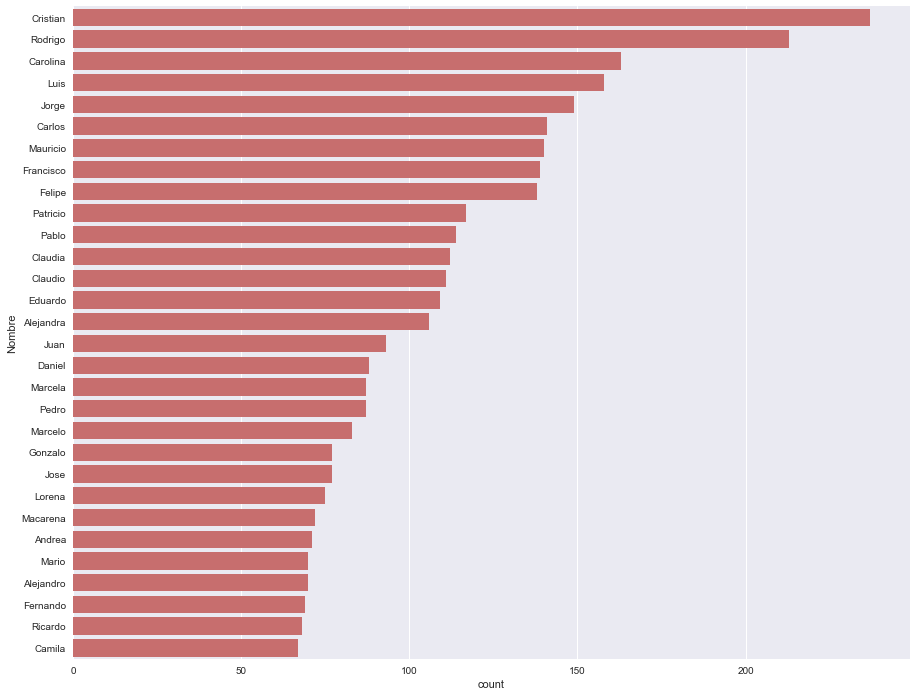

In [31]:
f = plt.figure()
print(cot_all['Nombre'].isnull().sum())
print(cot_all['Nombre'].nunique())
ver_atributo_categorico(cot_all,'Nombre', limit = True, lim=30)
# f.savefig('..\\img\\nombre_check.png', bbox_inches='tight')

### 1.2.23 Apellido 1

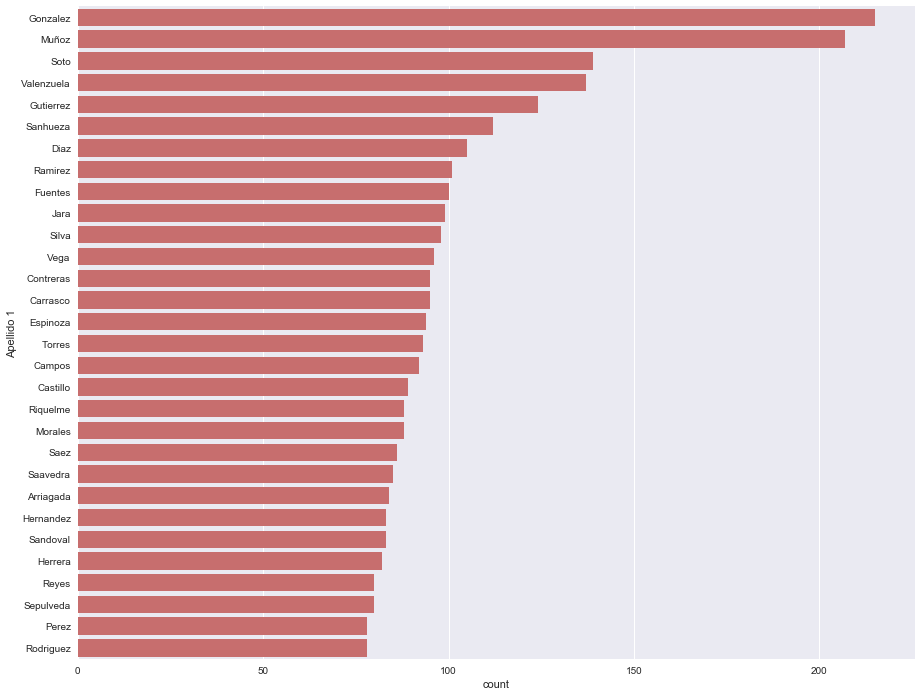

In [32]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Apellido 1', limit = True, lim=30)
# f.savefig('..\\img\\apellido1_check.png',bbox_inches='tight')

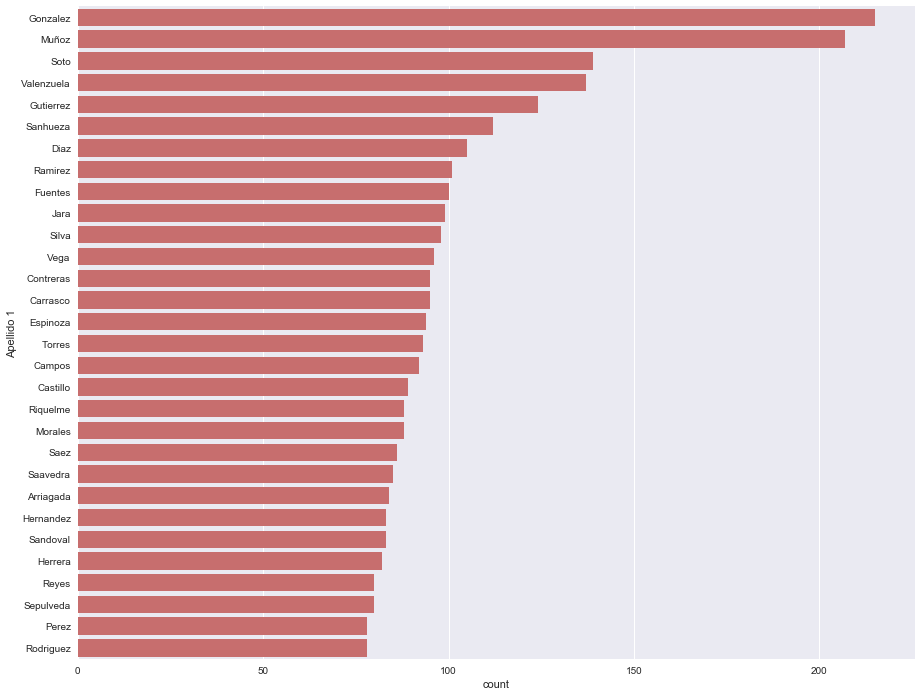

In [33]:
ver_atributo_categorico(cot_all,'Apellido 1', limit = True, lim=30)

### 1.2.23 Apellido 2

1666 ['Ulloa', 'Torres', 'Manriquez', 'Martinez', 'Gajardo', 'l', '.', 'Campos', 'Fica', 'Pineda', 'Erle', 'Vega', 'Casanova', 'Villegas', 'Herrera', 'Rodriguez', 'Lopez', 'Oliva', 'Cabezas', 'Figueroa', 'Lobos', 'Sanchez', 'Becerra', 'Reyes', 'Miranda', 'Vergara', 'Marianjel', 'Acuña', '*', 'Paredes', 'Larenas', 'Seguek', 'Olivares', '-', 'Guzman', 'Molina', 'Opazo', 'Vilugrón', '..', 'Esparza', 'Vivanco', 'Silva', 'Brañas', 'Quiroga', 'Mora', 'Rojas', 'Nuñez', 'Lazo', 'Ortiz', 'Sandoval', 'Höger', 'Araya', 'Ramirez', 'Cadenas', 'Vera', 'Contreras', 'Hoffmann', 'Cartes', 'Mahuzier', 'Salaberri', 'Hernandez', 'Flores', 'Ilufin', 'Sorensen', 'Romero', 'Jara', 'Suazo', 'Orellana', 'Navarrete', 'Roman', 'Pinto', 'Cottet', 'Irribarra', 'Lecaros', nan, 'Mella', 'Arevalo', 'Aguilera', 'Rios', 'Bolados', 'Vallejos', 'Maldonado', 'Sanchéz', 'Neira', 'Castillo', 'carter', 'Bobadilla', 'Ortega', 'Avello', 'Carmona', 'Carvallo', 'Valenzuela', 'Revello', 'Adonis', 'Martínez', 'Cifuentes', 'Cabrera

FileNotFoundError: [Errno 2] No such file or directory: '..\\img\\apellido2_check.png'

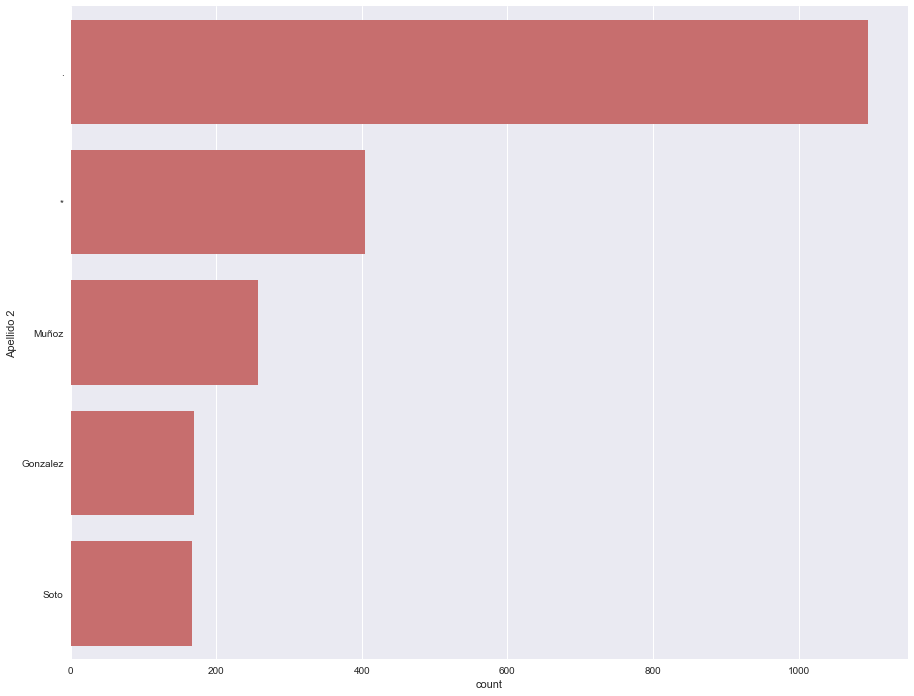

In [34]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Apellido 2',log=True, limit = True, lim=5)
f.savefig('..\\img\\apellido2_check.png',bbox_inches='tight')

### 1.2.24 Telefono

In [ ]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Telefono', limit = True, lim=10)
# f.savefig('..\\img\\telefono_check.png',bbox_inches='tight')

### 1.2.25 Celular

In [ ]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Celular',log=True, limit = True, lim=5)
# f.savefig('..\\img\\celular_check.png',bbox_inches='tight')

### 1.2.26 Nombre Completo

In [ ]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Nombre Completo', limit = True, lim=40)
# f.savefig('..\\img\\nombrecompleto_check.png',bbox_inches='tight')

In [ ]:
cot_all_copy = cot_all.copy()
print(cot_all.shape)
cot_all_copy.dropna(axis=1, inplace=True)
print(cot_all_copy.shape)
cot_all_copy.dropna(axis=0, inplace=True)
print(cot_all_copy.columns)
# cot_all.dropna(axis=1)

In [ ]:
print("Cot rut promedio: ",get_col_group_description(df,'RUT')['mean'])
print("Cot rut desviacion: ",get_col_group_description(df,'RUT')['std'])
print("Cot por rut maximo: ",get_col_group_description(df,'RUT')['max'])


### 2.4.Describe Data Combined Files: Negociacion

In [ ]:
#columns droped 'Fecha Promesa', 'Telefono', 'Fecha Escritura', 'Fecha Desistimiento', 'Fecha Resciliacion', 
# 'Resciliacion por Modificacion', 'Motivo Desis/Resc', 'Description Desis/Resc'

#columnas no importantes para el sgte paso
unimportant_columns = ['Apellido 1','Apellido 2','Celular','Ejecutivo Comercial','Region','Provincia','Jefe Comercial','ID']
to_select_cols = df.count().sort_values(ascending=True).index.tolist()
to_select_cols = to_select_cols[8:]
to_select_cols = [item for item in to_select_cols if item not in unimportant_columns]
# to_select_cols